Import essential libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Import data from file

In [3]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

data_df = pd.read_csv('adult.data', names=column_names, header=None)
data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32961,NaN,Private,252024.0,NaN,9.0,Never-married,Handlers-cleaners,Other-relative,NaN,Male,0.0,NaN,20.0,Mexico,<=50K
32962,NaN,NaN,96480.0,HS-grad,9.0,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,United-States,<=50K
32963,56.0,Private,133819.0,NaN,NaN,NaN,NaN,Not-in-family,White,NaN,NaN,0.0,40.0,NaN,NaN
32964,NaN,Private,NaN,HS-grad,NaN,Never-married,NaN,NaN,NaN,NaN,NaN,0.0,40.0,NaN,<=50K


Check N/A variables ratio

In [4]:
data_df.isna().mean() * 100

age               0.618819
workclass         0.637020
fnlwgt            0.618819
education         0.643087
education-num     0.603652
marital-status    0.618819
occupation        0.658254
relationship      0.691622
race              0.588485
sex               0.609719
capital-gain      0.649154
capital-loss      0.630953
hours-per-week    0.600619
native-country    0.612753
income            0.624886
dtype: float64

Handle N/A variables by replacing them with median (for numeric), and mode (for categorical) / Handling missing values with polinomial interpolation

In [5]:
missing_threshold = 0.80

# Drop columns with more than 80% N/A
high_missing_columns = data_df.columns[data_df.isna().mean() > missing_threshold]
print(high_missing_columns)

data_df = data_df.drop(columns=high_missing_columns)

# # Calculate mode values
# mode_values = data_df.mode()
# mode_values = mode_values.loc[0].to_dict()
# print(mode_values)

# # Calculate median values for numeric columns
# median_values = data_df.median(numeric_only=True).to_dict()
# print(median_values)

# # Fill in N/A values
# for column in data_df.columns:

#   if data_df[column].isna().any():

#     if data_df[column].dtype == 'object':
#       data_df[column] = data_df[column].fillna(mode_values[column])
#       data_df[column] = data_df[column].fillna(mode_values[column])

#     else:
#       data_df[column] = data_df[column].fillna(median_values[column])
#       data_df[column] = data_df[column].fillna(median_values[column])

data_df.interpolate(method='polynomial', order=2, inplace=True)

# drop remaining missing N/A values
data_df.dropna(inplace=True)

data_df

Index([], dtype='object')


/tmp/ipykernel_3413622/275511737.py:31: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_df.interpolate(method='polynomial', order=2, inplace=True)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.000000,State-gov,77516.0,Bachelors,13.000000,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,0.000000,40.000000,United-States,<=50K
1,50.000000,Self-emp-not-inc,83311.0,Bachelors,13.000000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,13.000000,United-States,<=50K
2,38.000000,Private,215646.0,HS-grad,9.000000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.000000,40.000000,United-States,<=50K
3,53.000000,Private,234721.0,11th,7.000000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.000000,40.000000,United-States,<=50K
4,28.000000,Private,338409.0,Bachelors,13.000000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.000000,40.000000,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32804,45.000000,Private,175625.0,HS-grad,9.000000,Separated,Adm-clerical,Unmarried,White,Female,0.000000,0.147181,38.000000,United-States,<=50K
32874,38.850408,Private,133055.0,HS-grad,9.000000,Never-married,Other-service,Own-child,White,Female,0.000000,0.000000,30.000000,United-States,<=50K
32878,60.000000,Private,216690.0,Some-college,10.000000,Married-civ-spouse,Prof-specialty,Husband,White,Male,10644.165301,0.000000,40.000000,?,<=50K
32928,39.000000,Self-emp-inc,206253.0,Bachelors,13.000000,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.000000,0.000000,22.510118,United-States,<=50K


Confirm N/A values are filled

In [6]:
data_df.isna().mean() * 100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

Plot the count plot for the income column

<Axes: xlabel='income', ylabel='count'>

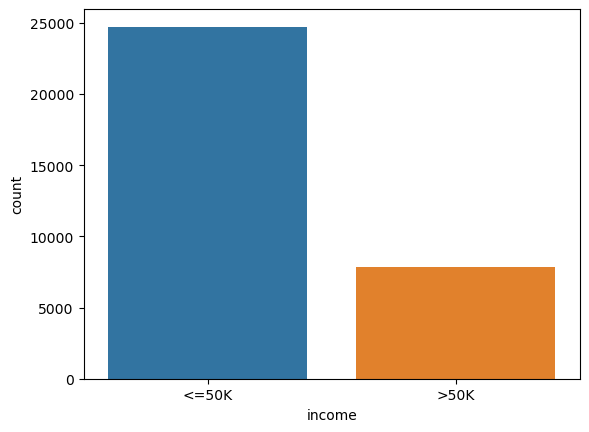

In [7]:
sns.countplot(x ='income', hue = "income", data = data_df)

Show the Descriptive Statistics for numerical attributes

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32571.000000  3.257100e+04   32571.000000  32571.000000  32571.000000   
mean      38.582907  1.897634e+05      10.080738   1077.644781     87.277275   
std       13.639977  1.055554e+05       2.572606   7384.370232    402.901205   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178150e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783530e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370190e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32571.000000  
mean        40.437706  
std         12.349339  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


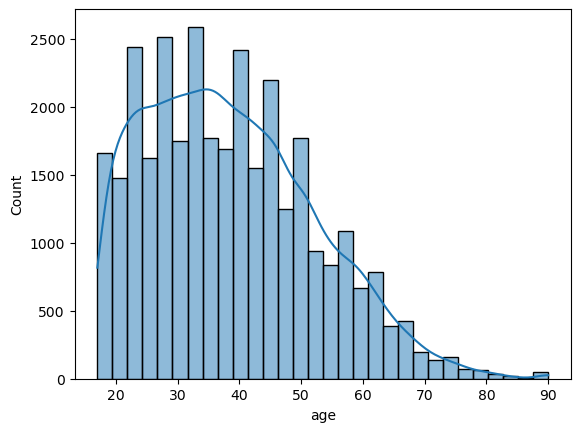

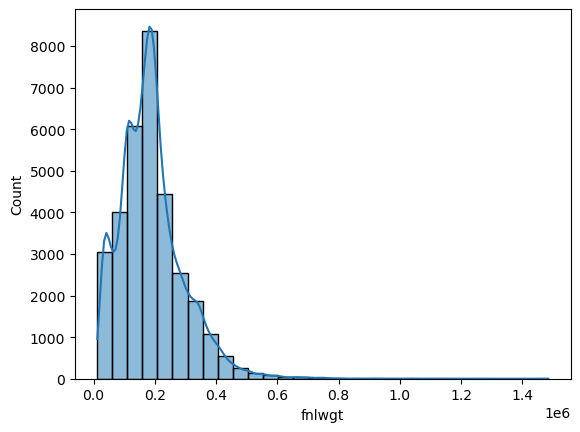

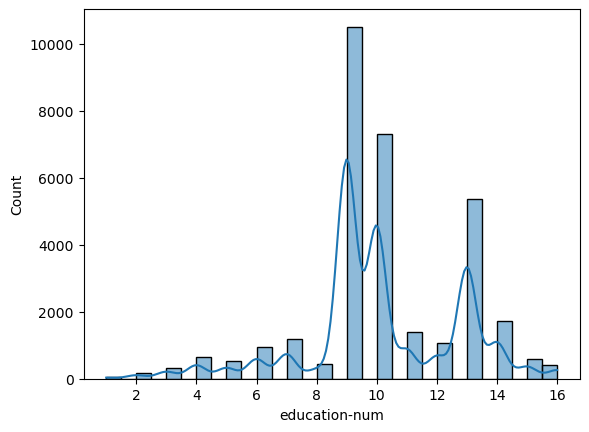

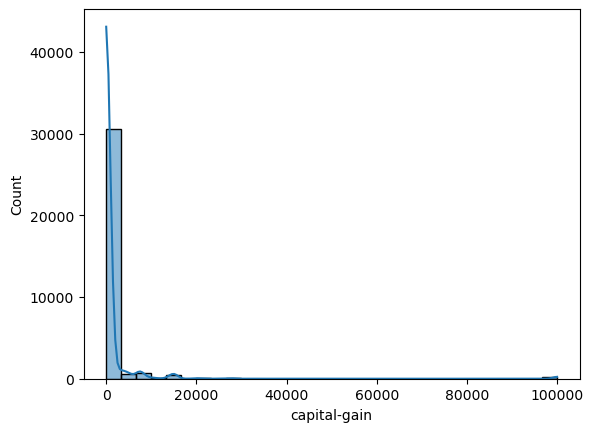

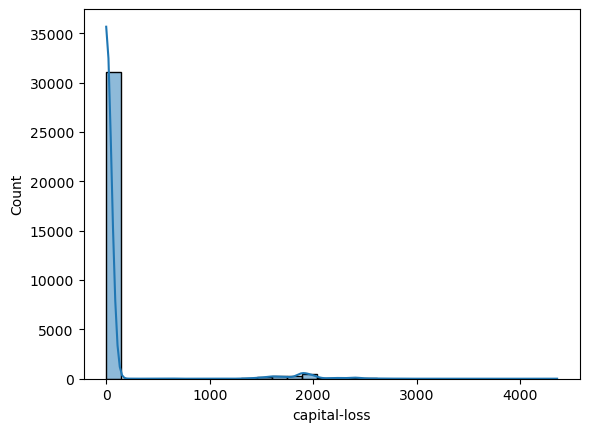

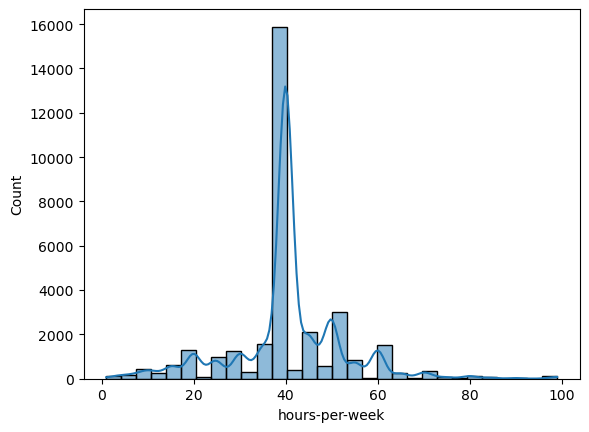

In [8]:
print(data_df.describe())

for column in data_df.columns:
    if data_df[column].dtype != 'object':
        sns.histplot(data=data_df, x=column, bins=30, kde=True)
        plt.show()

Encode income column as binary

In [9]:
data_df['income'] = data_df['income'].map({'>50K': 0, '<=50K': 1})
data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.000000,State-gov,77516.0,Bachelors,13.000000,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,0.000000,40.000000,United-States,1
1,50.000000,Self-emp-not-inc,83311.0,Bachelors,13.000000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,13.000000,United-States,1
2,38.000000,Private,215646.0,HS-grad,9.000000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.000000,40.000000,United-States,1
3,53.000000,Private,234721.0,11th,7.000000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.000000,40.000000,United-States,1
4,28.000000,Private,338409.0,Bachelors,13.000000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.000000,40.000000,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32804,45.000000,Private,175625.0,HS-grad,9.000000,Separated,Adm-clerical,Unmarried,White,Female,0.000000,0.147181,38.000000,United-States,1
32874,38.850408,Private,133055.0,HS-grad,9.000000,Never-married,Other-service,Own-child,White,Female,0.000000,0.000000,30.000000,United-States,1
32878,60.000000,Private,216690.0,Some-college,10.000000,Married-civ-spouse,Prof-specialty,Husband,White,Male,10644.165301,0.000000,40.000000,?,1
32928,39.000000,Self-emp-inc,206253.0,Bachelors,13.000000,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.000000,0.000000,22.510118,United-States,1


Normalize using z-score standardizatoin

In [10]:
numerical_cols = data_df.select_dtypes(include=["number"]).columns.difference(['income'])
df_mean = data_df[numerical_cols].mean()
df_std = data_df[numerical_cols].std()
data_df[numerical_cols] = (data_df[numerical_cols] - df_mean) / df_std
data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.030579,State-gov,-1.063397,Bachelors,1.134749,Never-married,Adm-clerical,Not-in-family,White,Male,0.148470,-0.216622,-0.035444,United-States,1
1,0.837032,Self-emp-not-inc,-1.008497,Bachelors,1.134749,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145936,-0.216622,-2.221796,United-States,1
2,-0.042735,Private,0.245204,HS-grad,-0.420095,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145936,-0.216622,-0.035444,United-States,1
3,1.056973,Private,0.425915,11th,-1.197517,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145936,-0.216622,-0.035444,United-States,1
4,-0.775874,Private,1.408224,Bachelors,1.134749,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145936,-0.216622,-0.035444,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32804,0.470462,Private,-0.133942,HS-grad,-0.420095,Separated,Adm-clerical,Unmarried,White,Female,-0.145936,-0.216257,-0.197396,United-States,1
32874,0.019612,Private,-0.537238,HS-grad,-0.420095,Never-married,Other-service,Own-child,White,Female,-0.145936,-0.216622,-0.845204,United-States,1
32878,1.570171,Private,0.255095,Some-college,-0.031384,Married-civ-spouse,Prof-specialty,Husband,White,Male,1.295509,-0.216622,-0.035444,?,1
32928,0.030579,Self-emp-inc,0.156218,Bachelors,1.134749,Married-civ-spouse,Prof-specialty,Wife,White,Female,-0.145936,-0.216622,-1.451704,United-States,1


Calculate the Covariance Matrix

In [11]:
numerical_df = data_df[numerical_cols]
cov_matrix = numerical_df.cov()
cov_matrix

,age,capital-gain,capital-loss,education-num,fnlwgt,hours-per-week
age,1.000000,0.077719,0.057748,0.036569,-0.076758,0.068618
capital-gain,0.077719,1.000000,-0.031614,0.122608,0.000464,0.078378
capital-loss,0.057748,-0.031614,1.000000,0.079910,-0.010220,0.054235
education-num,0.036569,0.122608,0.079910,1.000000,-0.043199,0.147981
fnlwgt,-0.076758,0.000464,-0.010220,-0.043199,1.000000,-0.018461
hours-per-week,0.068618,0.078378,0.054235,0.147981,-0.018461,1.000000


Display the Covariance Matrix using a heatmap

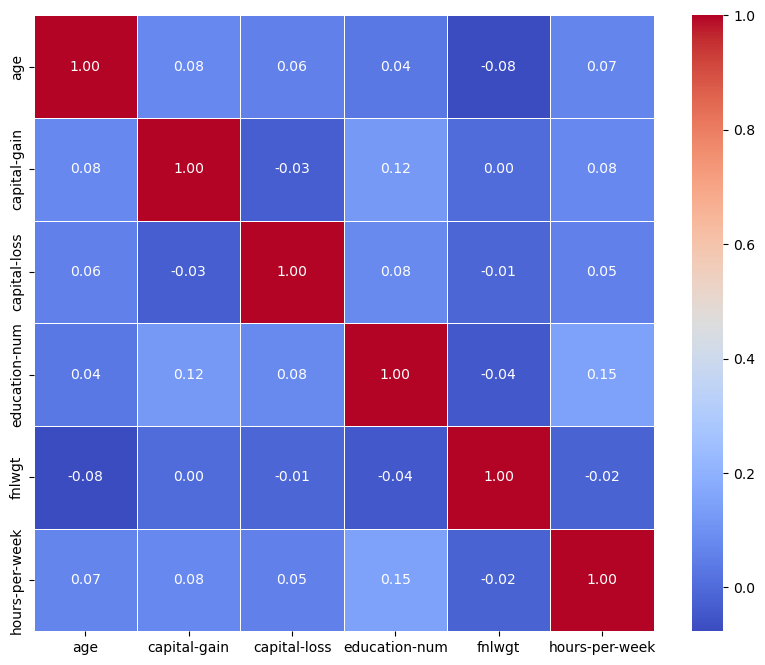

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.show()

Drop redundant data

In [13]:
data_df.drop(columns=["fnlwgt"], inplace=True)

Encoding categorical values as one-hot encoded values

In [14]:
categorical_cols = data_df.select_dtypes(include=["object"]).columns
data_df = pd.get_dummies(data_df, columns=categorical_cols, drop_first=True)
data_df

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030579,1.134749,0.148470,-0.216622,-0.035444,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.837032,1.134749,-0.145936,-0.216622,-2.221796,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.042735,-0.420095,-0.145936,-0.216622,-0.035444,1,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,1.056973,-1.197517,-0.145936,-0.216622,-0.035444,1,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,-0.775874,1.134749,-0.145936,-0.216622,-0.035444,1,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32804,0.470462,-0.420095,-0.145936,-0.216257,-0.197396,1,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32874,0.019612,-0.420095,-0.145936,-0.216622,-0.845204,1,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32878,1.570171,-0.031384,1.295509,-0.216622,-0.035444,1,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
32928,0.030579,1.134749,-0.145936,-0.216622,-1.451704,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Constructing KNN algorithm

In [15]:
class KNNClassifier:
    def __init__(self, k=5, features=None, target=None):
        self.k = k
        self.features = np.asarray(features, dtype=np.float64)
        self.target = target.to_numpy().ravel()
    
    def _euclidean_distance(self, a, b):
        a = np.asarray(a, dtype=np.float64).reshape(1, -1)
        return np.sqrt(np.sum((a - b) ** 2, axis=1))

    def predict(self, X_test):
        preds = []
        X_test = X_test.to_numpy()
        
        for point in X_test:
            distances = self._euclidean_distance(point, self.features)
            k_nearest_points = np.argsort(distances)[:self.k]
            k_nearest_classes = self.target[k_nearest_points]

            unique_labels, counts = np.unique(k_nearest_classes, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            preds.append(predicted_label)

        return np.array(preds)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        y_test = y_test.to_numpy()

        accuracy = np.mean(y_pred == y_test)

        tp = np.sum(y_pred & y_test)
        fp = np.sum(y_pred & ~y_test)
        fn = np.sum(~y_pred & y_test)

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall) / (precision + recall)

        return {"accuracy": accuracy, "precision": precision, "recall": recall, "F1-Score": f1_score}



Split features and target

In [16]:
X = data_df.drop(columns=['income'])
y = data_df['income']
X, y

(            age  education-num  capital-gain  capital-loss  hours-per-week  \
 0      0.030579       1.134749      0.148470     -0.216622       -0.035444   
 1      0.837032       1.134749     -0.145936     -0.216622       -2.221796   
 2     -0.042735      -0.420095     -0.145936     -0.216622       -0.035444   
 3      1.056973      -1.197517     -0.145936     -0.216622       -0.035444   
 4     -0.775874       1.134749     -0.145936     -0.216622       -0.035444   
 ...         ...            ...           ...           ...             ...   
 32804  0.470462      -0.420095     -0.145936     -0.216257       -0.197396   
 32874  0.019612      -0.420095     -0.145936     -0.216622       -0.845204   
 32878  1.570171      -0.031384      1.295509     -0.216622       -0.035444   
 32928  0.030579       1.134749     -0.145936     -0.216622       -1.451704   
 32929  0.543776       0.769266     -0.145936     -0.216622       -1.007156   
 
        workclass_Federal-gov  workclass_Local-gov

Split the dataset into train, test, and validation subsets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=10, stratify=y_train)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((23450, 99), (23450,), (2606, 99), (2606,), (6515, 99), (6515,))

Evaluate model on the dataset

In [18]:
knn_classifier = KNNClassifier(k=5, features=X_train, target=y_train)
knn_classifier.evaluate(X_test, y_test)

{'accuracy': np.float64(0.837145049884881),
 'precision': np.float64(0.885952712100139),
 'recall': np.float64(0.9015365952284674),
 'F1-Score': np.float64(0.8936767211143402)}

Comparing my model with scikit-learn's KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scikit_knn_classifier = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='euclidean')
scikit_knn_classifier.fit(X_train, y_train)

y_pred = scikit_knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"accuracy: {accuracy}\nprecision: {precision}\nrecall: {recall}\nF1-Score: {f1}")

accuracy: 0.8374520337682272
precision: 0.8844708209693373
recall: 0.9039627982207845
F1-Score: 0.8941105889411058


Using GridSearchCV to choose best parameters for knn classifier

In [20]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_neighbors': list(range(1, 51)),
    'p': list(range(1, 3))
}

scikit_knn_classifier = KNeighborsClassifier(algorithm='brute', metric='minkowski')
param_search = GridSearchCV(scikit_knn_classifier, grid, cv=10, scoring='f1', n_jobs=4, verbose=3)
param_search.fit(X_train, y_train)

param_search.best_params_, param_search.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END ...............n_neighbors=1, p=1;, score=0.869 total time=   3.6s
[CV 2/10] END ...............n_neighbors=1, p=1;, score=0.872 total time=   3.5s
[CV 3/10] END ...............n_neighbors=1, p=1;, score=0.864 total time=   3.6s
[CV 4/10] END ...............n_neighbors=1, p=1;, score=0.875 total time=   3.7s
[CV 6/10] END ...............n_neighbors=1, p=1;, score=0.865 total time=   3.6s
[CV 7/10] END ...............n_neighbors=1, p=1;, score=0.866 total time=   3.6s
[CV 5/10] END ...............n_neighbors=1, p=1;, score=0.868 total time=   3.6s
[CV 8/10] END ...............n_neighbors=1, p=1;, score=0.865 total time=   3.5s
[CV 1/10] END ...............n_neighbors=1, p=2;, score=0.869 total time=   0.6s
[CV 2/10] END ...............n_neighbors=1, p=2;, score=0.871 total time=   0.6s
[CV 3/10] END ...............n_neighbors=1, p=2;, score=0.867 total time=   0.5s
[CV 4/10] END ...............n_neighbors=1, 

({'n_neighbors': 25, 'p': 2}, np.float64(0.8979025683321874))

Using RandomizedSearchCV to choose best parameters for knn classifier

In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_search = RandomizedSearchCV(scikit_knn_classifier, grid, n_iter=35, cv=10, scoring='f1', n_jobs=4, verbose=3)
param_search.fit(X_train, y_train)

param_search.best_params_, param_search.best_score_

Fitting 10 folds for each of 35 candidates, totalling 350 fits
[CV 2/10] END ..............n_neighbors=47, p=1;, score=0.891 total time=   4.2s
[CV 1/10] END ..............n_neighbors=47, p=1;, score=0.898 total time=   4.2s
[CV 4/10] END ..............n_neighbors=47, p=1;, score=0.902 total time=   4.4s
[CV 3/10] END ..............n_neighbors=47, p=1;, score=0.897 total time=   4.5s
[CV 6/10] END ..............n_neighbors=47, p=1;, score=0.891 total time=   4.2s
[CV 5/10] END ..............n_neighbors=47, p=1;, score=0.904 total time=   4.4s
[CV 7/10] END ..............n_neighbors=47, p=1;, score=0.901 total time=   4.4s
[CV 8/10] END ..............n_neighbors=47, p=1;, score=0.898 total time=   4.4s
[CV 9/10] END ..............n_neighbors=47, p=1;, score=0.892 total time=   4.2s
[CV 2/10] END ..............n_neighbors=48, p=1;, score=0.888 total time=   4.3s
[CV 10/10] END .............n_neighbors=47, p=1;, score=0.898 total time=   4.6s
[CV 1/10] END ..............n_neighbors=48, p=

({'p': 2, 'n_neighbors': 25}, np.float64(0.8979025683321874))

Generate Classification Report for the best selected model (k=25, p=2)

In [22]:
from sklearn.metrics import classification_report

y_pred = param_search.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1569
           1       0.89      0.91      0.90      4946

    accuracy                           0.85      6515
   macro avg       0.79      0.78      0.78      6515
weighted avg       0.84      0.85      0.84      6515



Generate Confusion Matrix for the best selected model (k=25, p=2)

<Axes: >

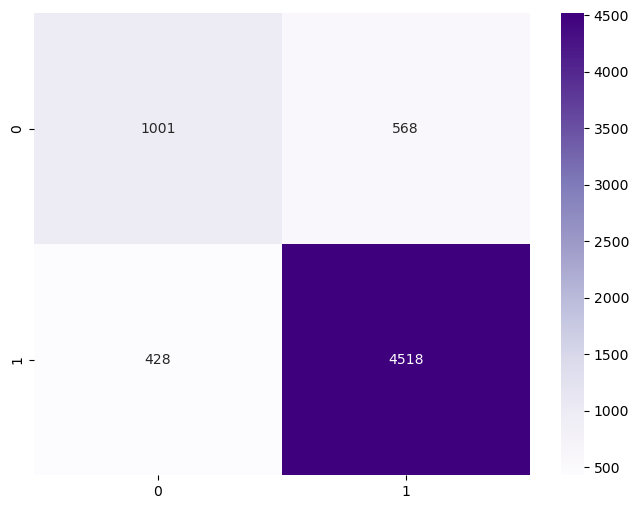

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Purples')

Check execution times for Brute-Force, KD-Tree, and Ball Tree algorithms

In [24]:
import time

algorithms = ['brute', 'kd_tree', 'ball_tree']
execution_times = {}

max_length = max(len(algo) for algo in algorithms)

for algorithm in algorithms:
    knn = KNeighborsClassifier(n_neighbors=25, algorithm=algorithm, metric='minkowski')

    knn.fit(X_train, y_train)

    start_time = time.time()
    y_pred = knn.predict(X_test)
    end_time = time.time()
    evaluation_time = end_time - start_time
    
    dots = '.' * (max_length + 20 - len(algorithm))
    print(f"Evaluating {algorithm.capitalize()} {dots} {evaluation_time:.2f}s")

Evaluating Brute ........................ 0.72s
Evaluating Kd_tree ...................... 14.23s
Evaluating Ball_tree .................... 22.88s
